In [47]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns

In [ ]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
os.chdir(path)

In [52]:
df = pd.read_csv('Datos/raw/Consumidores.csv',index_col=0)

In [53]:
df.head()

,Edad,Sexo,Renta,Recibe_sueldo_en_cuenta,Segmento_consumidor,Meses_antiguedad,Comuna,Ciudad,Estado_civil,Principalidad,Profesion,id
0,Mayor a 70,1,R1,0,A,Mayor a 10 años,331.0,13.0,D,B,P164,1
1,Mayor a 70,1,R9,0,B,Mayor a 10 años,37.0,5.0,D,E,P164,2
2,Mayor a 70,1,R9,1,B,Mayor a 10 años,19.0,4.0,B,D,P114,3
3,Mayor a 70,1,R10,0,B,Mayor a 10 años,37.0,5.0,B,C,P164,4
4,Mayor a 70,1,R4,0,A,Mayor a 10 años,91.0,13.0,D,B,P85,5


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79539 entries, 0 to 79552
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     79539 non-null  object 
 1   Sexo                     79539 non-null  int64  
 2   Renta                    79539 non-null  int32  
 3   Recibe_sueldo_en_cuenta  79539 non-null  int64  
 4   Segmento_consumidor      79539 non-null  object 
 5   Meses_antiguedad         79539 non-null  object 
 6   Comuna                   79481 non-null  float64
 7   Ciudad                   79535 non-null  float64
 8   Estado_civil             79539 non-null  object 
 9   Principalidad            67378 non-null  object 
 10  Profesion                79539 non-null  int32  
 11  id                       79539 non-null  int64  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 7.3+ MB


In [33]:
df.groupby('Edad')['Edad'].count()

Edad
Entre 25 y 30     6608
Entre 30 y 35    13393
Entre 35 y 40    13806
Entre 40 y 45    11940
Entre 45 y 50     9884
Entre 50 y 55     7310
Entre 55 y 60     5839
Entre 60 y 65     4441
Entre 65 y 70     2906
Mayor a 70        2919
Menor a 25         493
Name: Edad, dtype: int64

In [34]:
df.groupby('Meses_antiguedad')['Meses_antiguedad'].count()

Meses_antiguedad
Entre 1 y 2 años        22
Entre 2 y 3 años        19
Entre 3 y 4 años        27
Entre 4 y 5 años        34
Entre 5 y 6 años        48
Entre 6 y 7 años        54
Entre 7 y 8 años        49
Entre 8 y 9 años        73
Entre 9 y 10 años       83
Mayor a 10 años       1788
Menos de 1 año       77342
Name: Meses_antiguedad, dtype: int64

In [35]:
df.groupby('Estado_civil')['Estado_civil'].count()

Estado_civil
A    45817
B    20840
C      705
D     8448
E     3729
Name: Estado_civil, dtype: int64

In [36]:
df.groupby('Principalidad')['Principalidad'].count()

Principalidad
A    15487
B    18017
C     4319
D     9378
E     5355
F     9811
G     5011
Name: Principalidad, dtype: int64

In [54]:
df['Profesion'] = df['Profesion'].fillna('P0')

In [55]:
df['Renta'] = df['Renta'].str.replace(r'R', '').astype(int)
df['Profesion'] = df['Profesion'].str.replace(r'P', '').astype(int)

In [46]:
df.groupby('Profesion')['Profesion'].count().sort_values(ascending=False).head(40)

Profesion
P164    9923
P227    7120
P84     5619
P85     5388
P149    4645
P39     3308
P1      3257
P210    3054
P160    2445
P178    2326
P101    2324
P182    2064
P69     1367
P191    1249
P114    1061
P14     1051
P4      1012
P87      951
P38      826
P136     781
P167     659
P208     657
P82      641
P122     631
P196     579
P113     551
P97      546
P183     522
P193     516
P88      512
P18      491
P41      483
P94      437
P233     413
P66      390
P40      372
P148     345
P100     340
P238     328
P105     324
Name: Profesion, dtype: int64

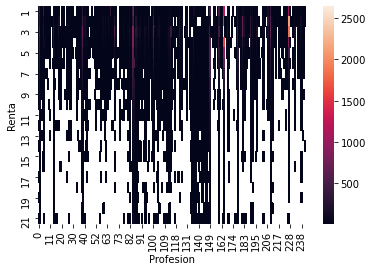

In [88]:
df_sns = df.groupby(['Renta', 'Profesion'], as_index=False)['id'].count()
df_sns['perc'] = df_sns['id']/df_sns['id'].sum()
df2 = df_sns.copy()
df_sns = df_sns.pivot('Renta', 'Profesion', 'id')
sns.heatmap(df_sns)

In [89]:
df2.describe()

,Renta,Profesion,id,perc
count,1980.000000,1980.000000,1980.000000,1980.000000
mean,7.759596,115.047980,40.171212,0.000505
std,5.409720,64.837085,143.246398,0.001801
min,1.000000,0.000000,1.000000,0.000013
25%,3.000000,65.750000,2.000000,0.000025
50%,6.000000,111.000000,4.000000,0.000050
75%,11.000000,163.000000,17.000000,0.000214
max,21.000000,241.000000,2648.000000,0.033292


In [93]:
df2

,Renta,Profesion,id,perc
0,1,0,161,0.002024
1,1,1,394,0.004954
2,1,2,21,0.000264
3,1,3,16,0.000201
4,1,4,386,0.004853
...,...,...,...,...
1975,21,193,2,0.000025
1976,21,201,1,0.000013
1977,21,210,13,0.000163
1978,21,226,1,0.000013


In [99]:
df2[df2['perc']>=0.000214].describe()

,Renta,Profesion,id,perc
count,494.000000,494.000000,494.000000,494.000000
mean,5.226721,117.378543,148.439271,0.001866
std,3.898980,65.378415,258.203678,0.003246
min,1.000000,0.000000,18.000000,0.000226
25%,3.000000,74.750000,31.000000,0.000390
50%,4.000000,111.000000,60.500000,0.000761
75%,7.000000,167.000000,140.250000,0.001763
max,21.000000,238.000000,2648.000000,0.033292


In [100]:
df2[df2['perc']>=0.000214].sum()

Renta         2582.000000
Profesion    57985.000000
id           73329.000000
perc             0.921925
dtype: float64

In [ ]:
df.groupby('Renta')['Renta'].count()